In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 800)


In [3]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=False)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df).sort_values(by="Ratio", ascending=False)
    return missing_df


def check_df(dataframe, head=5, tail=5):
    print("*" * 70)
    print(" Shape ".center(70, "*"))
    print("*" * 70)
    print(dataframe.shape)

    print("*" * 70)
    print(" Types ".center(70, "*"))
    print("*" * 70)
    print(dataframe.dtypes)

    print("*" * 70)
    print(" Head ".center(70, "*"))
    print("*" * 70)
    print(dataframe.head(head))

    print("*" * 70)
    print(" Tail ".center(70, "*"))
    print("*" * 70)
    print(dataframe.tail(tail))

    print("*" * 70)
    print(" NA ".center(70, "*"))
    print("*" * 70)
    print(missing_values_analysis(dataframe))

    print("*" * 70)
    print(" Quantiles ".center(70, "*"))
    print("*" * 70)
    print(dataframe.describe([.01, .05, .1, .5, .9, .95, .99]).T)

    print("*" * 70)
    print(" Duplicate Rows ".center(70, "*"))
    print("*" * 70)
    print(dataframe.duplicated().sum())

    print("*" * 70)
    print(" Uniques ".center(70, "*"))
    print("*" * 70)
    print(dataframe.nunique())

In [4]:
train = pd.read_csv("./data/train.csv", encoding="latin-1")
train.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
0,1829,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,6333
1,1104,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,2972
2,1850,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,4647
3,1059,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,4871
4,608,"{'M51.1', nan, 'M48.0'}","{0, 'B', 'C', 'D', 'A3'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,49,FEMALE,ORTOPED? SERV?S?,42,9,9046


In [5]:
test = pd.read_csv("./data/test.csv", encoding="latin-1")
test.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
0,1669,{'H26.9'},{'C'},Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13
1,2091,{'L05.9'},{'C'},Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6
2,585,{'M50.1'},{'A3'},Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14
3,1455,{'S42.2'},{'B'},Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14
4,1801,{'I82'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13


In [6]:
check_df(train)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(2822, 11)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
ElapsedTime(second)     int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     I

In [7]:
check_df(test)

**********************************************************************
******************************* Shape ********************************
**********************************************************************
(1211, 10)
**********************************************************************
******************************* Types ********************************
**********************************************************************
ID                      int64
DiagnosticICD10Code    object
SurgeryGroup           object
AnesthesiaType         object
SurgeryName            object
Age                     int64
Sex                    object
Service                object
DoctorID                int64
AnaesthetistID          int64
dtype: object
**********************************************************************
******************************** Head ********************************
**********************************************************************
     ID DiagnosticICD10Code SurgeryG

In [8]:
app_train = train.copy()
app_train.drop_duplicates(inplace=True)

In [9]:
app_test = test.copy()

In [10]:
app_train.duplicated().value_counts()

False    2796
dtype: int64

In [11]:
app_train.drop_duplicates(subset=["ID"], keep='first', inplace=True)

In [12]:
train[train.ID == 2273]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474
1871,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6472


In [13]:
app_train[app_train.ID == 2273]

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ElapsedTime(second)
1221,2273,"{nan, 'M20.1', 'I87.2'}","{'B', 'C'}",Spinal Anestezi,NaN,60,FEMALE,ORTOPED? SERV?S?,32,11,6474


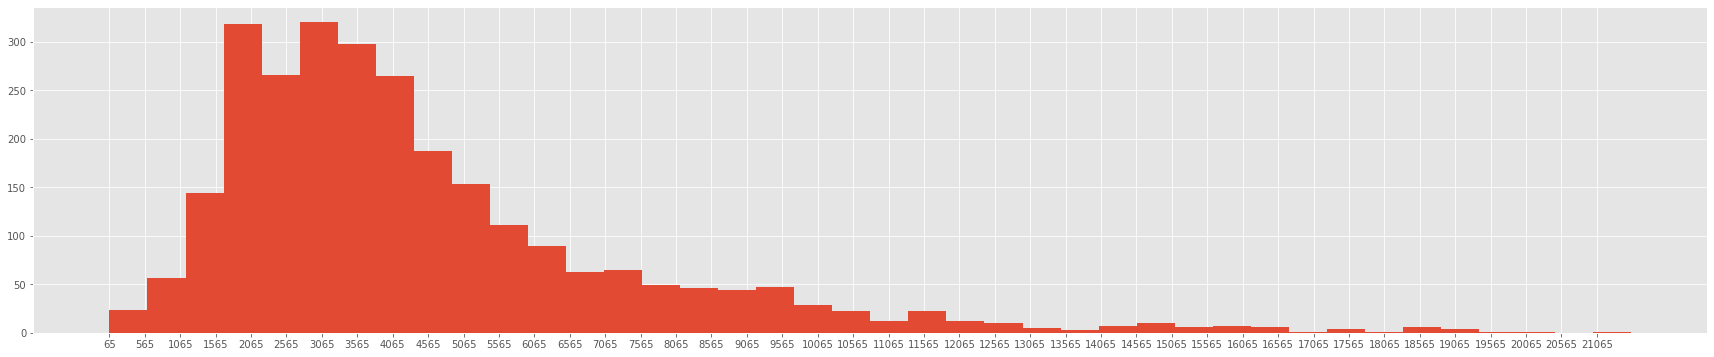

In [14]:
plt.figure(figsize=(30,6))
plt.style.use('ggplot')
plt.hist(app_train["ElapsedTime(second)"], bins=40)
plt.xticks(range(min(app_train["ElapsedTime(second)"]), max(app_train["ElapsedTime(second)"])+1, 500))
plt.show()


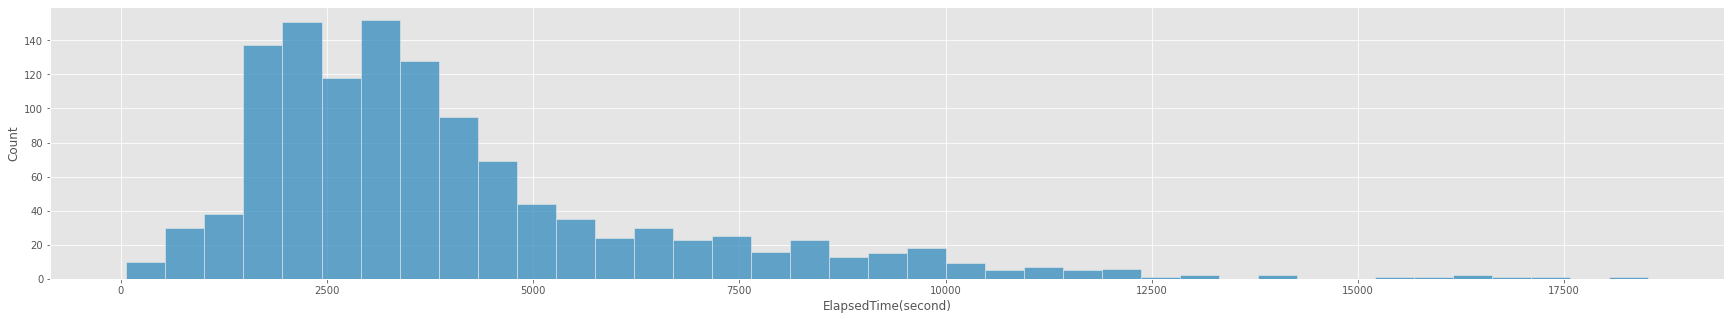

In [15]:
df = app_train[app_train['DiagnosticICD10Code'].str.len()==9]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(df["ElapsedTime(second)"]);


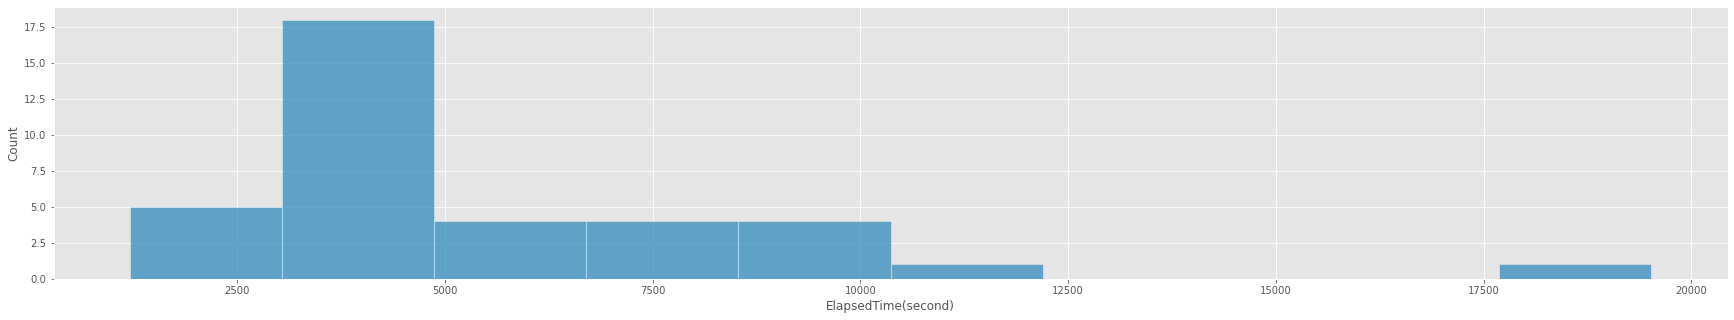

In [16]:
df = app_train[app_train['DiagnosticICD10Code'].str.len()==27]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(df["ElapsedTime(second)"]);


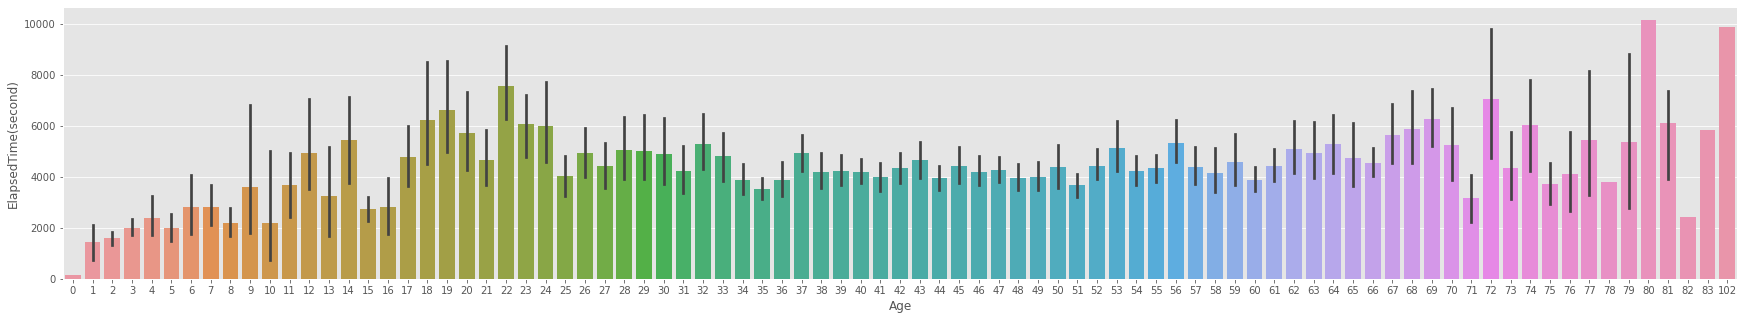

In [17]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=train["Age"], y="ElapsedTime(second)", data=train)
plt.show()


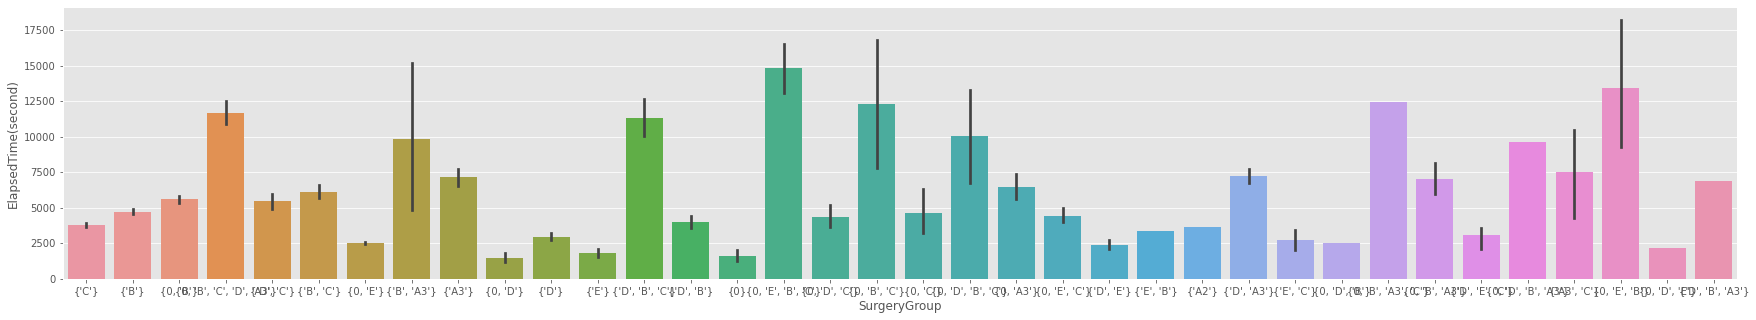

In [18]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["SurgeryGroup"], y="ElapsedTime(second)", data=app_train)
plt.show()


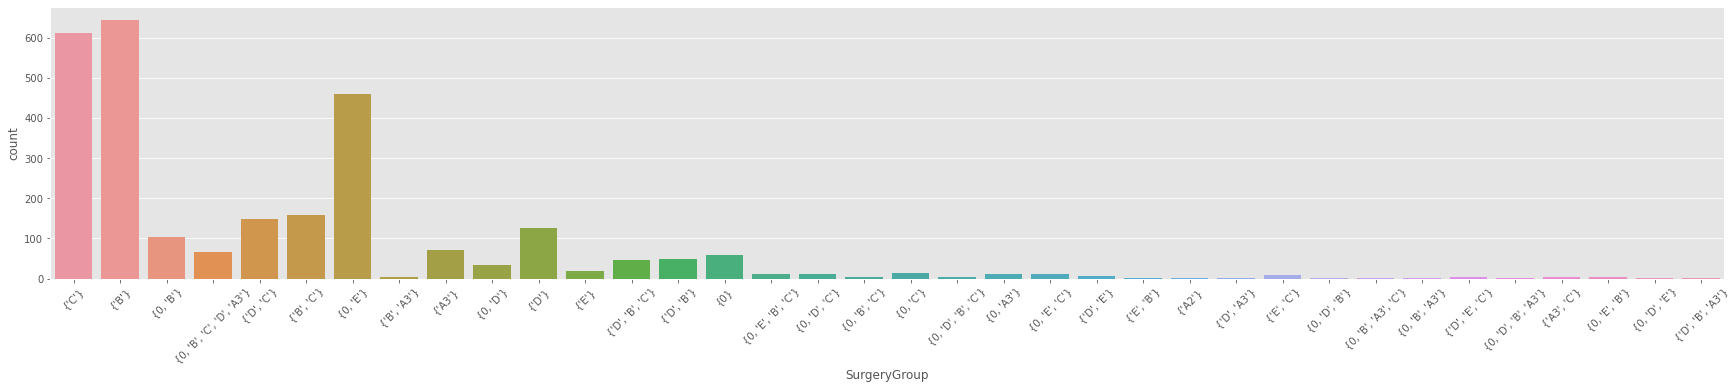

In [19]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.countplot(x=app_train["SurgeryGroup"], data=app_train)
plt.xticks(rotation=45)
plt.show()


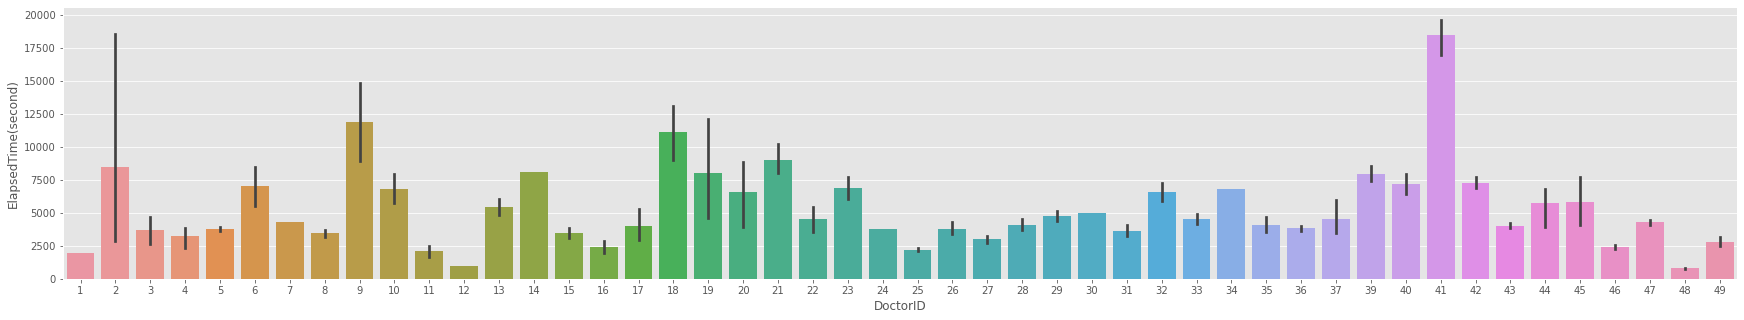

In [20]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["DoctorID"], y="ElapsedTime(second)", data=app_train)
plt.show()


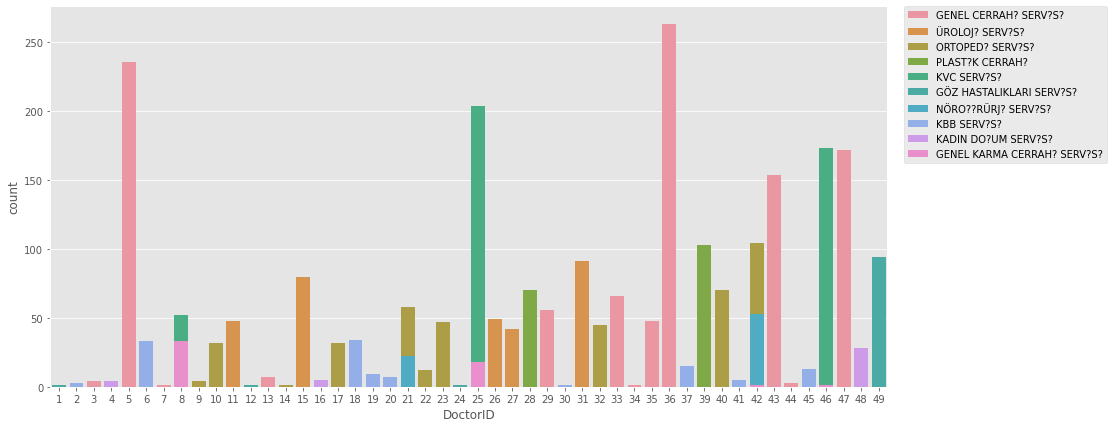

In [21]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x=app_train["DoctorID"], hue="Service", dodge=False, data=app_train)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.show()


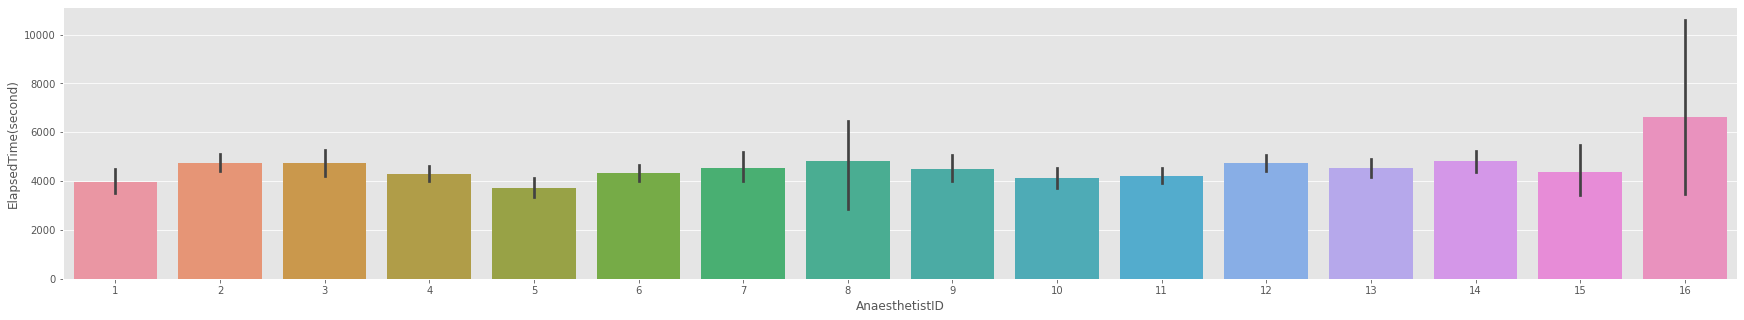

In [22]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["AnaesthetistID"], y="ElapsedTime(second)", data=app_train)
plt.show()


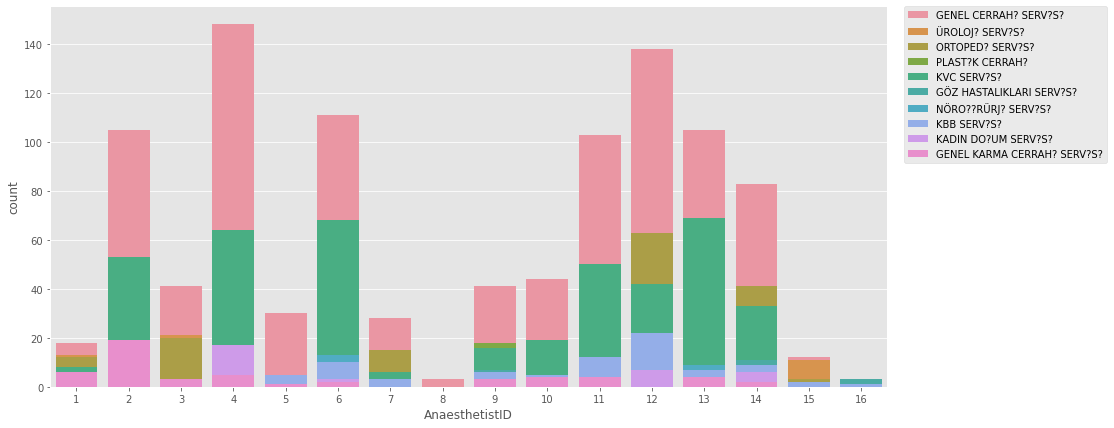

In [23]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.countplot(x=app_train["AnaesthetistID"], hue="Service", dodge=False, data=app_train)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0);
plt.show()


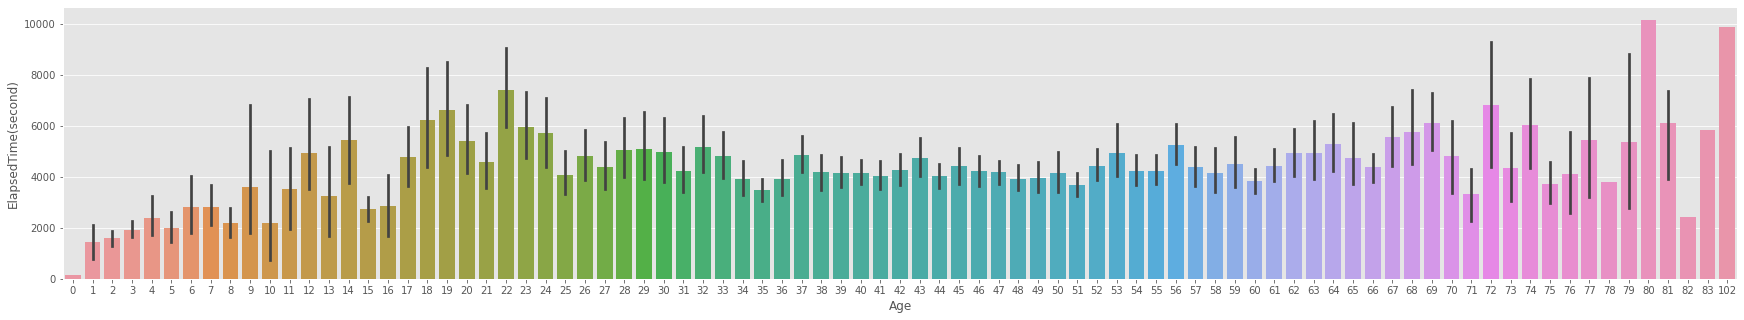

In [24]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["Age"], y="ElapsedTime(second)", data=app_train)
plt.show()


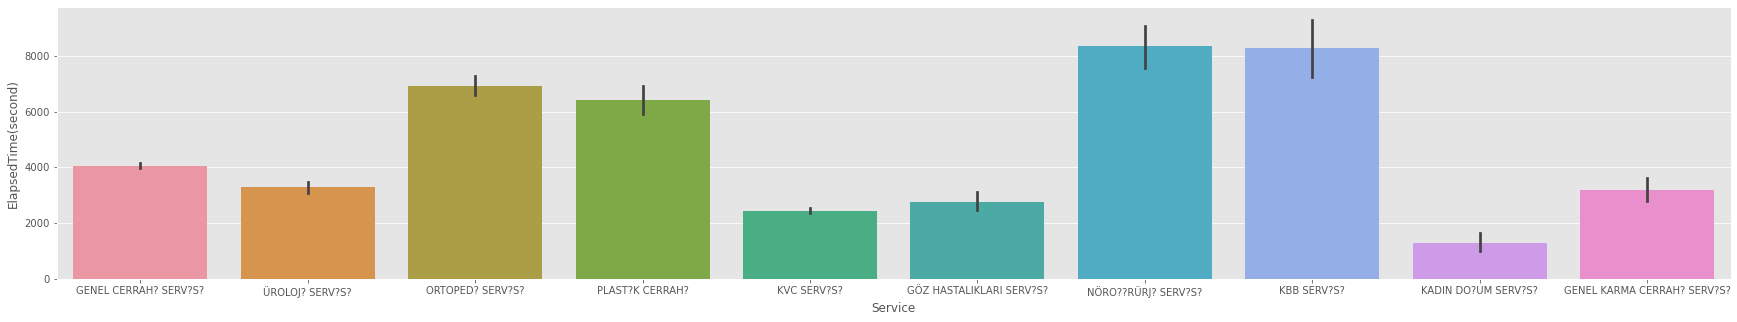

In [25]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x=app_train["Service"], y="ElapsedTime(second)", data=app_train)
plt.show()


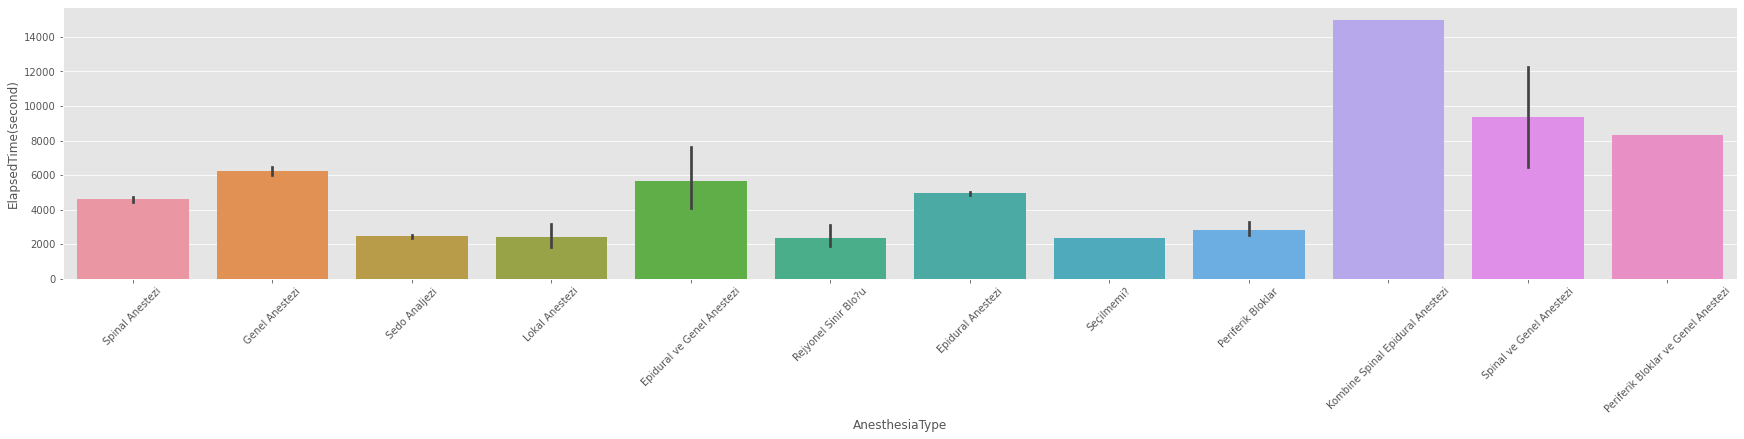

In [26]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="AnesthesiaType", y="ElapsedTime(second)", data=app_train)
plt.xticks(rotation=45)
plt.show()


In [27]:
fig = px.pie(app_train, values= app_train.index, names='Sex', title='Gender Percentage', width= 600, height=300)
fig.show()

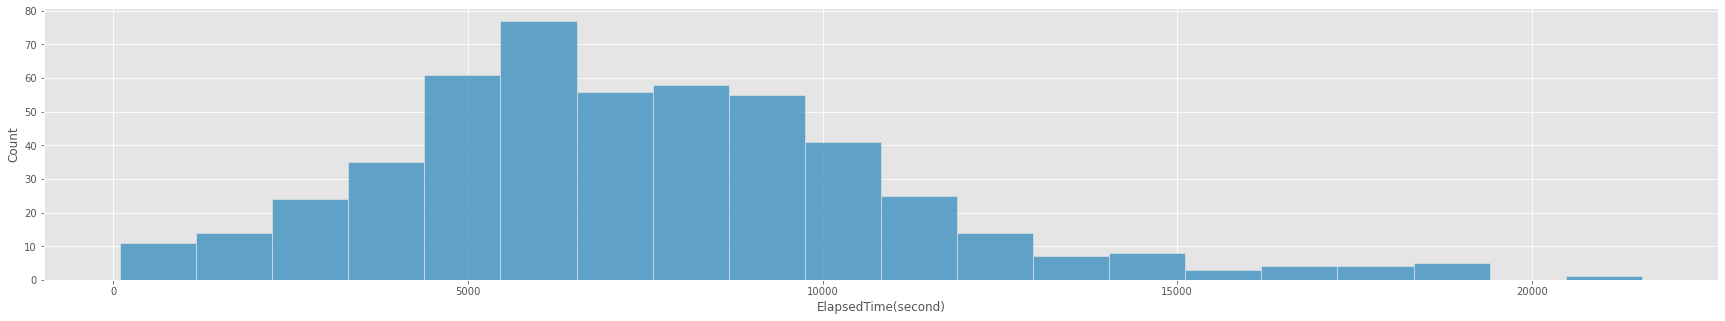

In [28]:
df = app_train[app_train["DiagnosticICD10Code"].str.contains('M', na=False)]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=df)
plt.show()


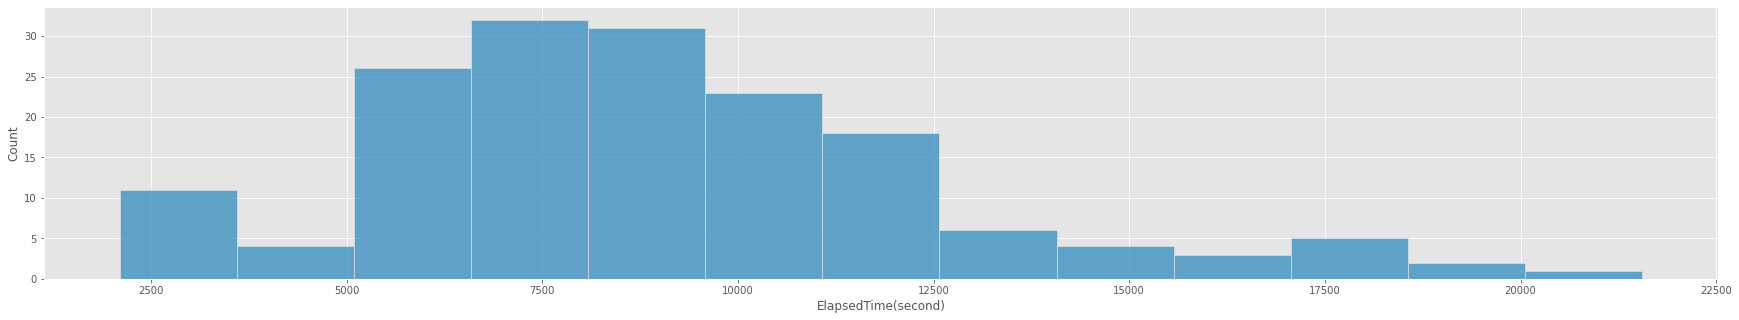

In [29]:
df = app_train[app_train["SurgeryGroup"].str.contains('A', na=False)]
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x= "ElapsedTime(second)", data=df)
plt.show()


In [14]:
df1 = app_train.drop(columns=["ID", "ElapsedTime(second)"])
df2 = app_test.drop(columns=["ID"])

In [15]:
df_merge = pd.merge(df1, df2, on=["DiagnosticICD10Code","SurgeryGroup","AnesthesiaType","SurgeryName","Age","Sex","Service","DoctorID","AnaesthetistID"], how='inner')
df1 = df1.append(df_merge) 

df1['Duplicated'] = df1.duplicated(keep=False) # keep=False marks the duplicated row with a True
df_final = df1[~df1['Duplicated']] # selects only rows which are not duplicated.
del df_final['Duplicated'], df1

In [16]:
df_final.shape

(2399, 9)

In [17]:
df2.shape

(1211, 9)

In [34]:
df2[df2.duplicated()==True]

,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
277,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",3,MALE,ÜROLOJ? SERV?S?,11,12
682,{'I83.9'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,43,FEMALE,KVC SERV?S?,46,14
721,{'N47'},"{0, 'D'}",Sedo Analjezi,"Sünnet derisinin fazlal???, fimozis ve parafim...",4,MALE,ÜROLOJ? SERV?S?,11,3
805,{'I83'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,32,FEMALE,KVC SERV?S?,46,9
857,{'I83.9'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,43,MALE,KVC SERV?S?,46,12
888,{'H25.1'},{'C'},Lokal Anestezi,Senil nükleer katarakt,69,MALE,GÖZ HASTALIKLARI SERV?S?,49,12
897,{'I83.9'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,42,FEMALE,KVC SERV?S?,25,2
925,{'I83.9'},"{0, 'E'}",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,47,FEMALE,KVC SERV?S?,46,6
1036,{'I83.9'},"{0, 'E'}",Lokal Anestezi,Ülser veya enflamasyon olmadan alt ekstremiten...,42,FEMALE,KVC SERV?S?,46,6


In [18]:
t = df_final.reset_index()
y = app_train.reset_index()
app_train = t.merge(y[["index","ID","ElapsedTime(second)"]], on='index', how='inner')
app_train.head()

,index,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ID,ElapsedTime(second)
0,0,{'L05'},{'C'},Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,1829,6333
1,1,{'N20.1'},{'C'},Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,1104,2972
2,2,{'K80.8'},{'B'},Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,1850,4647
3,3,"{nan, 'M51.1'}","{0, 'B'}",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,1059,4871
4,5,{'M95.0'},"{'D', 'C'}",Genel Anestezi,Burnun kazan?lm?? deformitesi,33,MALE,PLAST?K CERRAH?,39,13,1895,11146


In [19]:
app_train_clean = app_train.copy()
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str[1:-1]
app_train_clean["DiagnosticICD10Code"] = app_train_clean["DiagnosticICD10Code"].str.replace("'","")
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str[1:-1]
app_train_clean["SurgeryGroup"] = app_train_clean["SurgeryGroup"].str.replace("'","")
app_train_clean.head()

,index,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ID,ElapsedTime(second)
0,0,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,1829,6333
1,1,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,1104,2972
2,2,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,1850,4647
3,3,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,1059,4871
4,5,M95.0,"D, C",Genel Anestezi,Burnun kazan?lm?? deformitesi,33,MALE,PLAST?K CERRAH?,39,13,1895,11146


In [20]:
app_test_clean = app_test.copy()
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str[1:-1]
app_test_clean["DiagnosticICD10Code"] = app_test_clean["DiagnosticICD10Code"].str.replace("'","")
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str[1:-1]
app_test_clean["SurgeryGroup"] = app_test_clean["SurgeryGroup"].str.replace("'","")
app_test_clean.head()

,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13


In [21]:
app_train_clean['Any_NaN_Diagnos'] = app_train_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)
app_test_clean['Any_NaN_Diagnos'] = app_test_clean['DiagnosticICD10Code'].apply(lambda x: 1 if 'nan,' in str(x) else 0)



In [22]:
def clean_diagnosis(diagnosis):
    if isinstance(diagnosis, str):
        return set(diagnosis.replace(', nan', '').replace(' nan,', '').replace('nan,', '').replace(' ', '').split(','))
    else:
        return diagnosis

app_train_clean['Diagnos_Clean'] = app_train_clean['DiagnosticICD10Code'].apply(clean_diagnosis)
app_test_clean['Diagnos_Clean'] = app_test_clean['DiagnosticICD10Code'].apply(clean_diagnosis)

In [23]:
app_train_clean.Any_NaN_Diagnos.value_counts()

0    2009
1     390
Name: Any_NaN_Diagnos, dtype: int64

In [24]:
app_test_clean.Any_NaN_Diagnos.value_counts()

0    994
1    217
Name: Any_NaN_Diagnos, dtype: int64

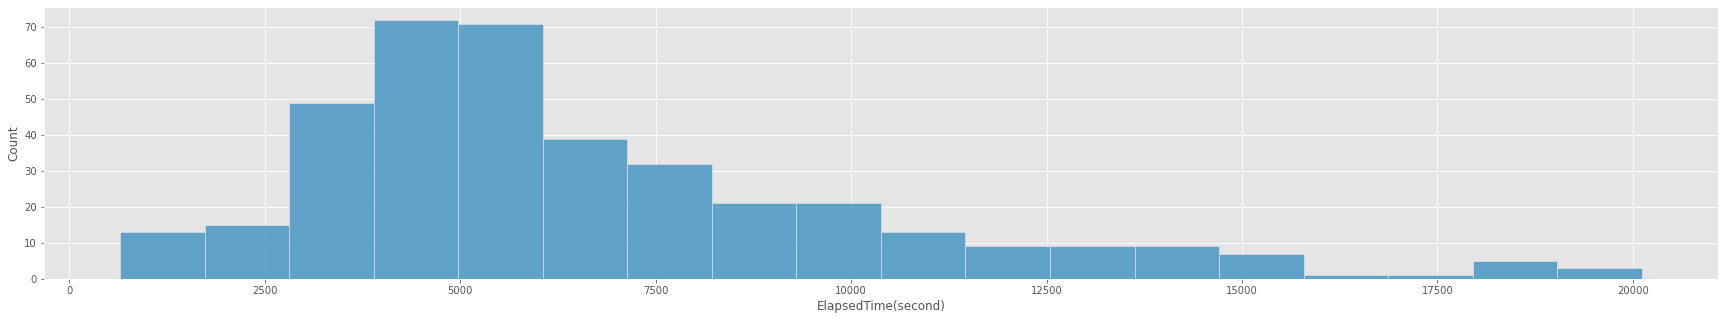

In [42]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.histplot(x="ElapsedTime(second)", data=app_train_clean[app_train_clean["Any_NaN_Diagnos"]==1])
plt.show()


In [25]:
map_dict = {'0': 1, 'E': 1, 'D': 2, 'C': 3, 'B': 4, 'A3': 5, 'A2': 6, 'A1': 7}
mapper = lambda x: [map_dict[val.strip()] for val in x.split(',')]
app_train_clean["SurgeryGroup_Encode"] = app_train_clean["SurgeryGroup"].apply(mapper)
app_test_clean["SurgeryGroup_Encode"] = app_test_clean["SurgeryGroup"].apply(mapper)



In [26]:
app_train_clean["SurgeryGroup_Sum"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_train_clean["SurgeryGroup_Count"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_train_clean["SurgeryGroup_Avg"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_train_clean["SurgeryGroup_Std"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_train_clean["SurgeryGroup_Max"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_train_clean["SurgeryGroup_Min"] = app_train_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

In [27]:
app_test_clean["SurgeryGroup_Sum"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.sum(x))
app_test_clean["SurgeryGroup_Count"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: len(x))
app_test_clean["SurgeryGroup_Avg"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.mean(x))
app_test_clean["SurgeryGroup_Std"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.std(x))
app_test_clean["SurgeryGroup_Max"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.max(x))
app_test_clean["SurgeryGroup_Min"] = app_test_clean["SurgeryGroup_Encode"].apply(lambda x: np.min(x))

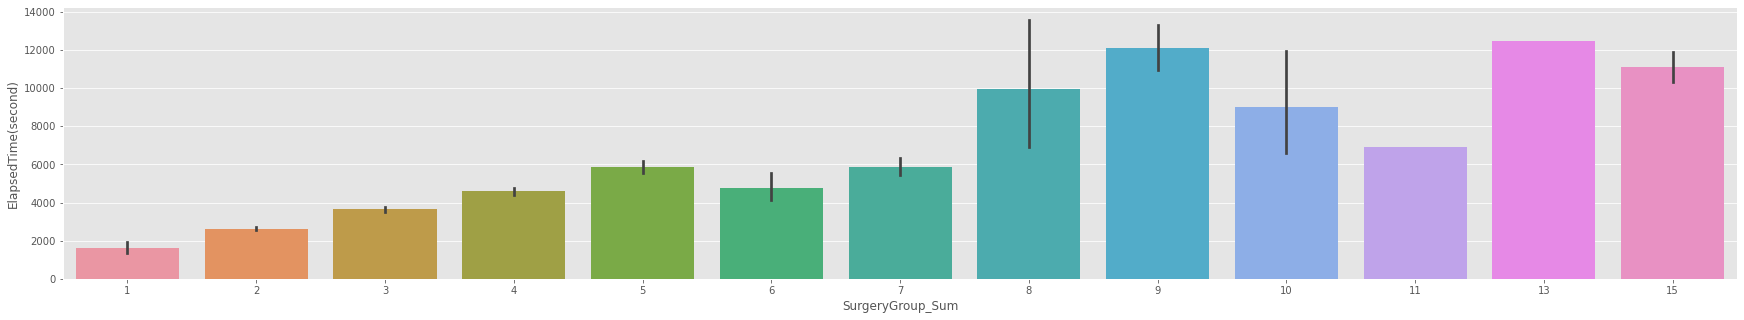

In [46]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="SurgeryGroup_Sum", y="ElapsedTime(second)", data=app_train_clean)
plt.show()


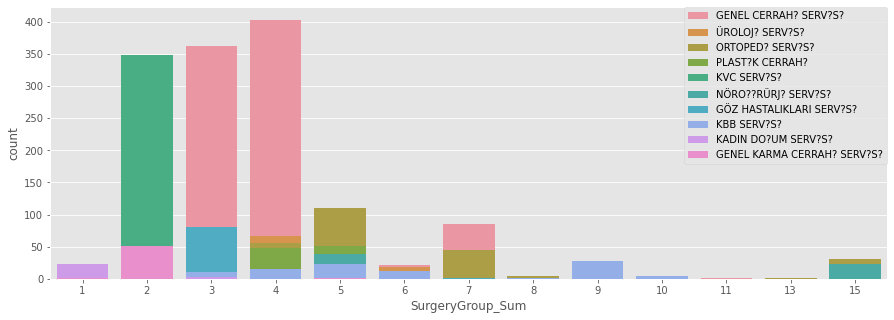

In [47]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="SurgeryGroup_Sum", hue="Service", dodge=False, data=app_train_clean)
plt.legend(loc='upper right', borderaxespad=0);
plt.show()


In [28]:
app_train_clean[app_train_clean["ID"]==1105]


,index,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
540,622,"K21.9, N30.2, R31, N30.0, M19.9",B,Spinal Anestezi,NaN,47,FEMALE,ÜROLOJ? SERV?S?,15,3,1105,6159,0,"{K21.9, N30.0, M19.9, R31, N30.2}",[4],4,1,4.0,0.0,4,4


In [29]:
app_train_clean.loc[540, "Diagnos_Clean"] = np.nan
app_train_clean["Diagnos_Clean"] = app_train_clean["Diagnos_Clean"].fillna('')
app_train_clean['Diagnos_Clean'] = app_train_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))
app_train_clean.head()



,index,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,ID,ElapsedTime(second),Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
0,0,L05,C,Spinal Anestezi,Pilonidal kist,26,MALE,GENEL CERRAH? SERV?S?,5,13,1829,6333,0,[L05],[3],3,1,3.0,0.0,3,3
1,1,N20.1,C,Spinal Anestezi,NaN,24,MALE,ÜROLOJ? SERV?S?,15,3,1104,2972,0,[N20.1],[3],3,1,3.0,0.0,3,3
2,2,K80.8,B,Genel Anestezi,"Kolelitiazis, di?er",38,MALE,GENEL CERRAH? SERV?S?,36,14,1850,4647,0,[K80.8],[4],4,1,4.0,0.0,4,4
3,3,"nan, M51.1","0, B",Genel Anestezi,Lumbar ve di?er intervertebral disk bozuklukla...,41,FEMALE,ORTOPED? SERV?S?,42,6,1059,4871,1,[M51.1],"[1, 4]",5,2,2.5,1.5,4,1
4,5,M95.0,"D, C",Genel Anestezi,Burnun kazan?lm?? deformitesi,33,MALE,PLAST?K CERRAH?,39,13,1895,11146,0,[M95.0],"[2, 3]",5,2,2.5,0.5,3,2


In [30]:
app_test_clean.loc[787, "Diagnos_Clean"] = np.nan
app_test_clean.loc[285, "Diagnos_Clean"] = np.nan
app_test_clean.loc[154, "Diagnos_Clean"] = np.nan
app_test_clean.loc[1010, "Diagnos_Clean"] = np.nan
app_test_clean.loc[21, "Diagnos_Clean"] = np.nan

app_test_clean["Diagnos_Clean"] = app_test_clean["Diagnos_Clean"].fillna('')
app_test_clean['Diagnos_Clean'] = app_test_clean['Diagnos_Clean'].apply(lambda x: sorted(x, key=lambda d: d[0]))
app_test_clean.head()



,ID,DiagnosticICD10Code,SurgeryGroup,AnesthesiaType,SurgeryName,Age,Sex,Service,DoctorID,AnaesthetistID,Any_NaN_Diagnos,Diagnos_Clean,SurgeryGroup_Encode,SurgeryGroup_Sum,SurgeryGroup_Count,SurgeryGroup_Avg,SurgeryGroup_Std,SurgeryGroup_Max,SurgeryGroup_Min
0,1669,H26.9,C,Sedo Analjezi,NaN,70,FEMALE,GÖZ HASTALIKLARI SERV?S?,49,13,0,[H26.9],[3],3,1,3.0,0.0,3,3
1,2091,L05.9,C,Spinal Anestezi,Pilonidal kist,41,MALE,GENEL CERRAH? SERV?S?,36,6,0,[L05.9],[3],3,1,3.0,0.0,3,3
2,585,M50.1,A3,Genel Anestezi,"Servikal disk bozukluklar?, radikülopati ile",59,FEMALE,ORTOPED? SERV?S?,42,14,0,[M50.1],[5],5,1,5.0,0.0,5,5
3,1455,S42.2,B,Genel Anestezi,Humerus üst uç k?r???,54,FEMALE,ORTOPED? SERV?S?,23,14,0,[S42.2],[4],4,1,4.0,0.0,4,4
4,1801,I82,"0, E",Sedo Analjezi,Ülser veya enflamasyon olmadan alt ekstremiten...,50,MALE,KVC SERV?S?,46,13,0,[I82],"[1, 1]",2,2,1.0,0.0,1,1


In [31]:
app_train_clean.shape

(2399, 21)

In [32]:
app_test_clean.shape

(1211, 19)

In [33]:
a = app_train_clean.copy()
b = app_test_clean.copy()

In [54]:
app_train_clean=a.copy()
app_test_clean=b.copy()

In [34]:
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()
import itertools

# example DataFrame

# function to generate all possible combinations for a set of diagnoses
def generate_combinations(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag[0] for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        app_train_clean.at[i, col_name] = combo

  0%|          | 0/2399 [00:00<?, ?it/s]

In [35]:
def generate_combinations_full(diagnoses):
    diagnoses = [d for d in diagnoses if pd.notna(d)]
    first_chars = [diag for diag in diagnoses]
    combinations = []
    for i in range(1, len(diagnoses)+1):
        for combo in itertools.combinations(first_chars, i):
            combinations.append('-'.join(combo))
    return combinations

# generate all combinations for each patient and add them as new columns to the DataFrame
for i, row in tqdm(app_train_clean.iterrows(), total=len(app_train_clean)):
    combos = generate_combinations_full(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'comb_full_{j+1}'
        app_train_clean.at[i, col_name] = combo

  0%|          | 0/2399 [00:00<?, ?it/s]

In [36]:
for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'comb_{j+1}'
        app_test_clean.at[i, col_name] = combo

  0%|          | 0/1211 [00:00<?, ?it/s]

In [37]:
for i, row in tqdm(app_test_clean.iterrows(), total=len(app_test_clean)):
    combos = generate_combinations_full(row['Diagnos_Clean'])
    for j, combo in enumerate(combos):
        col_name = f'comb_full_{j+1}'
        app_test_clean.at[i, col_name] = combo

  0%|          | 0/1211 [00:00<?, ?it/s]

In [38]:
app_train_clean.shape

(2399, 51)

In [39]:
app_test_clean.shape

(1211, 49)

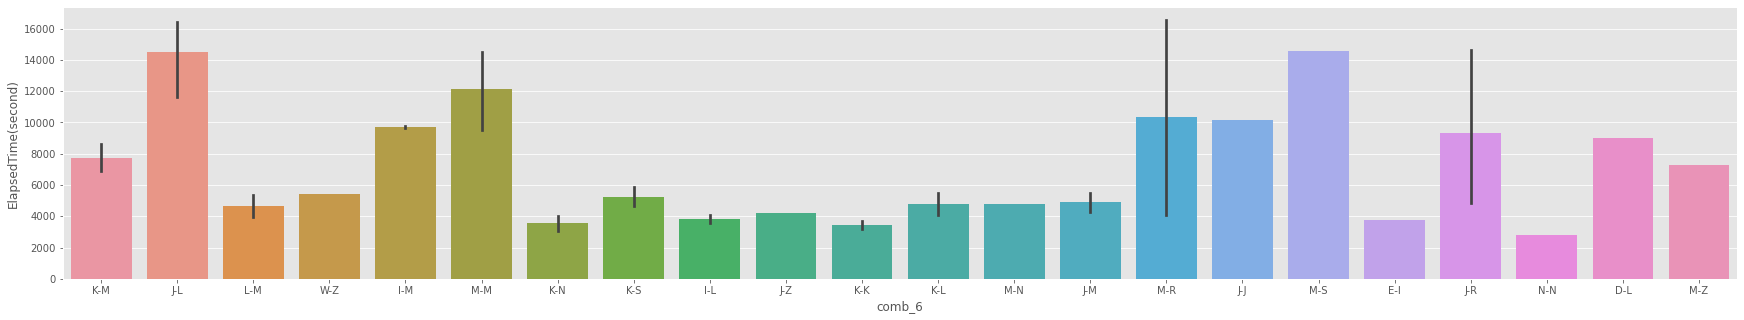

In [61]:
fig, ax = plt.subplots(figsize=(30, 5))
sns.barplot(x="comb_6", y="ElapsedTime(second)", data=app_train_clean)
plt.show()

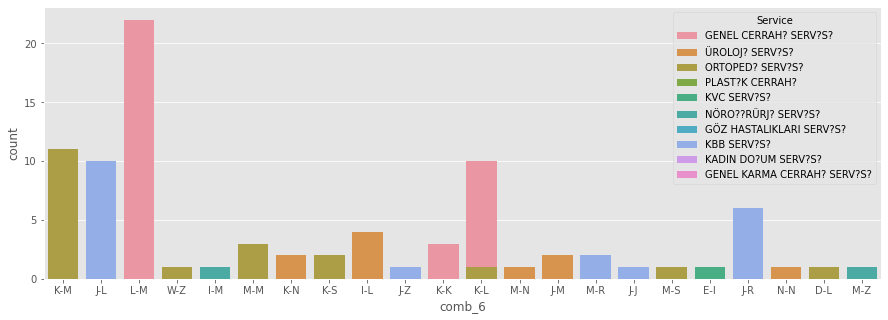

In [62]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x="comb_6", hue="Service", dodge=False, data=app_train_clean)
plt.show()

In [40]:
app_train_encode = app_train_clean.copy()
app_test_encode = app_test_clean.copy()


In [41]:
app_train_encode['Age_Range'] = pd.cut(app_train_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])
app_test_encode['Age_Range'] = pd.cut(app_test_encode['Age'], bins=[0, 18, 45, 65, 102], labels=['child', 'young', 'mid', 'old'])


In [42]:
train_ohe_cols = list(app_train_encode.columns[3:5]) + list(app_train_encode.columns[6:10]) + list(app_train_encode.columns[21:])
test_ohe_cols = list(app_test_encode.columns[3:5]) + list(app_test_encode.columns[6:10]) + list(app_test_encode.columns[19:])


In [43]:
set(train_ohe_cols) - set(test_ohe_cols)

set()

In [44]:
app_train_encode = pd.get_dummies(app_train_encode, columns=train_ohe_cols)

In [45]:
app_test_encode = pd.get_dummies(app_test_encode, columns=test_ohe_cols)

In [46]:
app_train_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID", "index"], inplace = True)

In [47]:
app_test_encode.drop(columns=["DiagnosticICD10Code", "SurgeryGroup", "Diagnos_Clean", "SurgeryGroup_Encode", "Sex_FEMALE", "ID"], inplace = True)


In [48]:
filtered_cols = app_train_encode.filter(like='gangrensiz veya obstr')
new_col = filtered_cols.sum(axis=1)
app_train_encode["SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz_merged"] = new_col


In [49]:
app_train_encode.shape

(2399, 1154)

In [50]:
t.shape

(2399, 10)

In [51]:
app_train_encode = app_train_encode.drop(columns=filtered_cols.columns)

In [52]:
filtered_cols = app_test_encode.filter(like='gangrensiz veya obstr')
new_col = filtered_cols.sum(axis=1)
app_test_encode["SurgeryName_Tek tarafl? veya tan?mlanmam?? inguinal herni, gangrensiz veya obstrüksiyonsuz_merged"] = new_col


In [53]:
app_test_encode = app_test_encode.drop(columns=filtered_cols.columns)

In [54]:
target = app_train_encode["ElapsedTime(second)"]

In [55]:
app_train_encode, app_test_encode = app_train_encode.align(app_test_encode, join = 'inner', axis = 1)

In [56]:
app_train_encode.shape

(2399, 724)

In [57]:
app_test_encode.shape

(1211, 724)

In [58]:
app_train_encode["ElapsedTime(second)"] = target


In [90]:
app_train_encode.to_csv("train_dropped_duplicates_diag[0]_encoded_merged_same_2column_aligned_full_comb.csv", index=False)
app_test_encode.to_csv("test_dropped_duplicates_diag[0]_encoded_merged_same_2column_aligned_full_comb.csv", index=False)

In [119]:
Best_trial = {'iterations': 606,
 'learning_rate': 0.06604890528806343,
 'depth': 10,
 'l2_leaf_reg': 2.2499392999225874e-05,
 'bagging_temperature': 0.9567780308857151,
 'random_strength': 0.7409519838755032,
 'border_count': 26}

In [151]:
from sklearn.model_selection import KFold
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re

y = app_train_encode["ElapsedTime(second)"]
X = app_train_encode.drop(columns=["ElapsedTime(second)"])

mse_errs = []
rmse_errs = []
mae_errs = []
r2_errs = []

models = []

kf = KFold(n_splits=10, shuffle=True, random_state= 42)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

    model = CatBoostRegressor(**Best_trial,verbose=0)

    model.fit(X_train, y_train,
                eval_set = [(X_val, y_val), (X_train, y_train)],
                early_stopping_rounds = 100, verbose = 200)
    
    
    preds = model.predict(X_val)
    
    rmse_err = mean_squared_error(y_val, preds, squared=False)
    print("Fold RMSE: ", rmse_err)
    rmse_errs.append(rmse_err)

    mse_err = mean_squared_error(y_val, preds)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)

    r2_err = r2_score(y_val, preds)
    print("Fold R2: ", r2_err)
    r2_errs.append(r2_err)

    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - Catboost Average of Folds"
)
fig.show()

Train shape: (2159, 717) | Val Shape: (240, 717)
0:	learn: 2832.9524198	test: 2854.5920076	test1: 2832.9524198	best: 2832.9524198 (0)	total: 16.9ms	remaining: 10.2s
200:	learn: 897.5794882	test: 1367.0126281	test1: 897.5794882	best: 897.5794882 (200)	total: 3.46s	remaining: 6.98s
400:	learn: 603.1543550	test: 1340.2662567	test1: 603.1543550	best: 603.1543550 (400)	total: 6.78s	remaining: 3.46s
600:	learn: 454.4528385	test: 1349.0710433	test1: 454.4528385	best: 454.4528385 (600)	total: 10.2s	remaining: 84.8ms
605:	learn: 452.0117560	test: 1348.8801090	test1: 452.0117560	best: 452.0117560 (605)	total: 10.3s	remaining: 0us

bestTest = 452.011756
bestIteration = 605

Fold RMSE:  1348.8801089712395
Fold MSE:  1819477.5483782627
Fold MAE:  962.8397191914262
Fold R2:  0.791154200359419

 ********************************************************************** 

Train shape: (2159, 717) | Val Shape: (240, 717)
0:	learn: 2871.5027769	test: 2508.7689603	test1: 2871.5027769	best: 2871.5027769 (0)	t

In [121]:
user_id = test["ID"]

model_preds = [model.predict(app_test_encode) for model in models]
model_preds

[array([2693.82468371, 3086.25340924, 8233.55105239, ..., 5028.39964021,
        4142.30959333, 4336.34747866]),
 array([2819.28393739, 2898.5232365 , 7539.25263641, ..., 4438.01990721,
        3087.06023698, 4428.22869946]),
 array([3106.60188156, 2804.38079086, 8892.2598992 , ..., 4474.86188348,
        4045.12884555, 4423.17454431]),
 array([2725.69834848, 2949.46562228, 8098.51112024, ..., 3677.91640899,
        3070.19230257, 4740.60105263]),
 array([2896.65436872, 2846.51053029, 8627.1800272 , ..., 3787.45878185,
        3049.83121971, 4885.83516122]),
 array([2852.3732383 , 2932.26848842, 8114.37267359, ..., 4672.5724794 ,
        3101.79707295, 4620.58087343]),
 array([2719.68284923, 3124.02042353, 7841.3850324 , ..., 4677.73095636,
        3447.66815344, 4990.01207062]),
 array([2884.96514898, 2973.18938319, 8225.97073194, ..., 4593.14857789,
        3593.04582899, 4907.29506358]),
 array([2845.03070303, 3011.57552812, 7193.0976895 , ..., 4441.97183253,
        3212.50604924, 

In [122]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = user_id
sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

In [125]:
sample_submission.to_csv("sample_submission_catboost_regressor.csv", index = False)

In [59]:
Best_trial = {'lambda': 0.09348564661290355,
 'alpha': 3.3269828386697995,
 'colsample_bytree': 0.5,
 'subsample': 0.6,
 'learning_rate': 0.02,
 'n_estimators': 1400,
 'max_depth': 5,
 'random_state': 25,
 'min_child_weight': 1}

In [60]:
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
y = app_train_encode["ElapsedTime(second)"]
X = app_train_encode.drop(columns=["ElapsedTime(second)"])
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]


mse_errs = []
rmse_errs = []
mae_errs = []
r2_errs = []

models = []

kf = KFold(n_splits=10, shuffle=True, random_state= 42)

for split_train, split_val in list(kf.split(X)):
    
    split_train = X.index[split_train]
    split_val = X.index[split_val]
    
    X_train, y_train = X.loc[split_train], y.loc[split_train]
    X_val, y_val = X.loc[split_val], y.loc[split_val]
    print("Train shape:", X_train.shape, "|", "Val Shape:", X_val.shape)

    model = xgb.XGBRegressor(**Best_trial)
    

    model.fit(X_train, y_train, eval_set = [(X_val, y_val), (X_train, y_train)], eval_metric='rmse', early_stopping_rounds = 35, verbose=200)
    
    preds = model.predict(X_val)
    
    rmse_err = mean_squared_error(y_val, preds, squared=False)
    print("Fold RMSE: ", rmse_err)
    rmse_errs.append(rmse_err)

    mse_err = mean_squared_error(y_val, preds)
    print("Fold MSE: ", mse_err)
    mse_errs.append(mse_err)

    mae_err = mean_absolute_error(y_val, preds)
    print("Fold MAE: ", mae_err)
    mae_errs.append(mae_err)

    r2_err = r2_score(y_val, preds)
    print("Fold R2: ", r2_err)
    r2_errs.append(r2_err)

    models.append(model)
    
    print("\n", "*"*70, "\n")

import plotly.express as px
importance = [model.feature_importances_ for model in models]

f_importance = pd.concat([pd.Series(X.columns.to_list(),name='Feature'),
                        pd.Series(np.mean(importance,axis=0),name="Importance")],
                        axis=1).sort_values(by='Importance',
                                            ascending=True)

fig = px.bar(f_importance.tail(20),x='Importance',y='Feature')
fig.update_layout(
    title_text="First 20 Important Features - XGB Average of Folds"
)
fig.show()

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:5412.13569	validation_1-rmse:5229.84945


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1533.93159	validation_1-rmse:1288.50153
[400]	validation_0-rmse:1471.90991	validation_1-rmse:1129.08698
[600]	validation_0-rmse:1442.15013	validation_1-rmse:1046.35591
[800]	validation_0-rmse:1412.87265	validation_1-rmse:987.07413
[1000]	validation_0-rmse:1411.27309	validation_1-rmse:936.65039
[1200]	validation_0-rmse:1401.32703	validation_1-rmse:892.93976
[1399]	validation_0-rmse:1398.30811	validation_1-rmse:853.15584
Fold RMSE:  1398.3081163128074
Fold MSE:  1955265.5881462719
Fold MAE:  990.2415542602539
Fold R2:  0.775567988937215

 ********************************************************************** 

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:4896.45480	validation_1-rmse:5286.51050


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1498.16625	validation_1-rmse:1300.59453
[400]	validation_0-rmse:1464.76349	validation_1-rmse:1148.14932
[600]	validation_0-rmse:1446.24295	validation_1-rmse:1060.94650
[800]	validation_0-rmse:1441.91064	validation_1-rmse:987.44334
[1000]	validation_0-rmse:1439.11173	validation_1-rmse:933.49457
[1200]	validation_0-rmse:1439.51578	validation_1-rmse:888.80384
[1399]	validation_0-rmse:1439.99828	validation_1-rmse:850.08302
Fold RMSE:  1439.9982739723243
Fold MSE:  2073595.0290432735
Fold MAE:  963.3567774454752
Fold R2:  0.6890875372194264

 ********************************************************************** 

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:5555.90811	validation_1-rmse:5213.82397


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1729.20715	validation_1-rmse:1277.69026
[400]	validation_0-rmse:1684.90030	validation_1-rmse:1136.92763
[600]	validation_0-rmse:1678.53153	validation_1-rmse:1055.62452
[800]	validation_0-rmse:1673.99384	validation_1-rmse:995.00392
[1000]	validation_0-rmse:1678.48045	validation_1-rmse:947.06471
[1200]	validation_0-rmse:1679.99961	validation_1-rmse:902.51320
[1399]	validation_0-rmse:1687.74738	validation_1-rmse:864.34263
Fold RMSE:  1687.7473805191503
Fold MSE:  2848491.2204492535
Fold MAE:  1086.912287902832
Fold R2:  0.7338232895333896

 ********************************************************************** 

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:5050.60014	validation_1-rmse:5268.69783


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1548.18927	validation_1-rmse:1287.02658
[400]	validation_0-rmse:1515.65271	validation_1-rmse:1135.42576
[600]	validation_0-rmse:1507.22812	validation_1-rmse:1047.87282
[800]	validation_0-rmse:1507.55805	validation_1-rmse:988.84974
[1000]	validation_0-rmse:1511.78464	validation_1-rmse:944.80438
[1200]	validation_0-rmse:1512.77620	validation_1-rmse:899.49902
[1399]	validation_0-rmse:1515.76764	validation_1-rmse:865.65667
Fold RMSE:  1515.7676213430675
Fold MSE:  2297551.481912021
Fold MAE:  968.8864616394043
Fold R2:  0.6728786472268946

 ********************************************************************** 

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:5174.92558	validation_1-rmse:5255.23459


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1651.17814	validation_1-rmse:1274.97199
[400]	validation_0-rmse:1612.43755	validation_1-rmse:1135.37102
[600]	validation_0-rmse:1592.82414	validation_1-rmse:1041.70037
[800]	validation_0-rmse:1581.76594	validation_1-rmse:980.42899
[1000]	validation_0-rmse:1577.93535	validation_1-rmse:929.65388
[1200]	validation_0-rmse:1575.26735	validation_1-rmse:885.17629
[1399]	validation_0-rmse:1571.22181	validation_1-rmse:845.03170
Fold RMSE:  1571.2217998941376
Fold MSE:  2468737.944462573
Fold MAE:  1042.0540766398112
Fold R2:  0.7030716450015899

 ********************************************************************** 

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:5588.48077	validation_1-rmse:5208.34061


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1637.17114	validation_1-rmse:1297.59582
[400]	validation_0-rmse:1563.38188	validation_1-rmse:1156.06512
[600]	validation_0-rmse:1537.38185	validation_1-rmse:1072.52991
[800]	validation_0-rmse:1518.86692	validation_1-rmse:1007.41042
[1000]	validation_0-rmse:1517.91596	validation_1-rmse:955.83333
[1200]	validation_0-rmse:1522.67982	validation_1-rmse:911.79500
[1399]	validation_0-rmse:1515.49683	validation_1-rmse:873.98786
Fold RMSE:  1515.496832953552
Fold MSE:  2296730.6506922464
Fold MAE:  1007.9149281819662
Fold R2:  0.7911284086180208

 ********************************************************************** 

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:5235.78532	validation_1-rmse:5249.90535


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1496.36427	validation_1-rmse:1289.67032
[400]	validation_0-rmse:1435.73086	validation_1-rmse:1141.91024
[600]	validation_0-rmse:1407.01372	validation_1-rmse:1060.73271
[800]	validation_0-rmse:1401.45068	validation_1-rmse:990.82578
[1000]	validation_0-rmse:1389.23800	validation_1-rmse:940.65372
[1200]	validation_0-rmse:1389.14841	validation_1-rmse:896.47388
[1399]	validation_0-rmse:1384.58719	validation_1-rmse:859.25815
Fold RMSE:  1384.5871880260156
Fold MSE:  1917081.6812457892
Fold MAE:  961.2248517354329
Fold R2:  0.7605202701442946

 ********************************************************************** 

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:5011.69005	validation_1-rmse:5273.05424


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1457.23953	validation_1-rmse:1300.35025
[400]	validation_0-rmse:1432.97739	validation_1-rmse:1144.11368
[600]	validation_0-rmse:1421.53694	validation_1-rmse:1055.96979
[800]	validation_0-rmse:1415.51539	validation_1-rmse:987.96763
[1000]	validation_0-rmse:1424.66068	validation_1-rmse:930.83228
[1200]	validation_0-rmse:1422.67410	validation_1-rmse:887.54866
[1399]	validation_0-rmse:1431.52262	validation_1-rmse:848.97725
Fold RMSE:  1431.5226180084023
Fold MSE:  2049257.0058696305
Fold MAE:  976.8558008829752
Fold R2:  0.7450359047308444

 ********************************************************************** 

Train shape: (2159, 724) | Val Shape: (240, 724)
[0]	validation_0-rmse:5460.73935	validation_1-rmse:5222.86035


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1649.86511	validation_1-rmse:1280.87770
[400]	validation_0-rmse:1618.69333	validation_1-rmse:1133.14612
[600]	validation_0-rmse:1608.86366	validation_1-rmse:1042.81785
[800]	validation_0-rmse:1616.60734	validation_1-rmse:980.04165
[1000]	validation_0-rmse:1621.21229	validation_1-rmse:927.68810
[1200]	validation_0-rmse:1624.49072	validation_1-rmse:880.99774
[1399]	validation_0-rmse:1632.08527	validation_1-rmse:846.75811
Fold RMSE:  1632.0852841373082
Fold MSE:  2663702.374697558
Fold MAE:  1058.520682779948
Fold R2:  0.7278470674442692

 ********************************************************************** 

Train shape: (2160, 724) | Val Shape: (239, 724)
[0]	validation_0-rmse:5046.85512	validation_1-rmse:5270.29161


c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
c:\Users\Furka\anaconda3\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[200]	validation_0-rmse:1457.20423	validation_1-rmse:1298.14916
[400]	validation_0-rmse:1446.04585	validation_1-rmse:1152.52086
[600]	validation_0-rmse:1450.26575	validation_1-rmse:1059.48418
[800]	validation_0-rmse:1469.12780	validation_1-rmse:992.62566
[1000]	validation_0-rmse:1474.44925	validation_1-rmse:944.54299
[1200]	validation_0-rmse:1474.49160	validation_1-rmse:903.21189
[1399]	validation_0-rmse:1475.00466	validation_1-rmse:867.26438
Fold RMSE:  1475.004661542972
Fold MSE:  2175638.7515734974
Fold MAE:  998.3820300241894
Fold R2:  0.74206700183601

 ********************************************************************** 



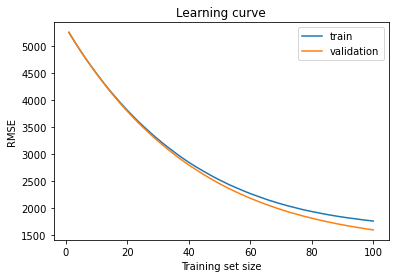

In [65]:
train_errors = []
val_errors = []

# Loop over the sizes of the training set
for i in range(1,101):
    # Concatenate the models' evaluation results from the first i folds
    train_evals = [models[j].evals_result()['validation_0']['rmse'][:i] for j in range(len(models))]
    val_evals = [models[j].evals_result()['validation_1']['rmse'][:i] for j in range(len(models))]
    
    # Compute the mean and standard deviation of the evaluation results at each training set size
    train_mean = np.mean(train_evals, axis=0)
    train_std = np.std(train_evals, axis=0)
    val_mean = np.mean(val_evals, axis=0)
    val_std = np.std(val_evals, axis=0)
    
    # Append the mean errors to the lists
    train_errors.append(train_mean[-1])
    val_errors.append(val_mean[-1])
    
# Plot the learning curve
plt.plot(range(1, 101), train_errors, label='train')
plt.plot(range(1, 101), val_errors, label='validation')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning curve')
plt.legend()
plt.show()





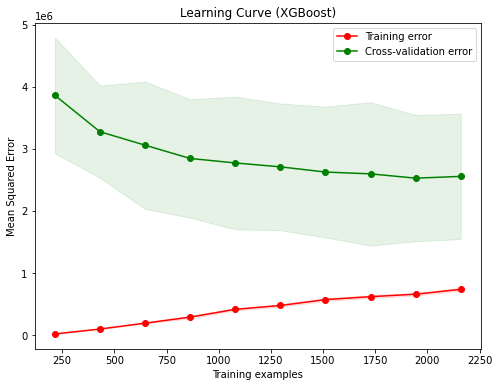

In [66]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, valid_scores = learning_curve(
    model, X, y, train_sizes=train_sizes, cv=10, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate the mean and standard deviation of the training and validation scores
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
valid_mean = -np.mean(valid_scores, axis=1)
valid_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, valid_mean - valid_std,
                 valid_mean + valid_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r",
         label="Training error")
plt.plot(train_sizes, valid_mean, 'o-', color="g",
         label="Cross-validation error")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.legend(loc="best")
plt.title("Learning Curve (XGBoost)")
plt.show()

In [ ]:
user_id = test["ID"]

model_preds = [model.predict(app_test_encode) for model in models]
model_preds

[array([2405.902 , 3035.5554, 8178.37  , ..., 4199.2334, 3397.0369,
        4073.3215], dtype=float32),
 array([2406.1555, 2947.717 , 7865.3994, ..., 4004.3022, 3578.696 ,
        4478.9087], dtype=float32),
 array([2562.5322, 3081.4836, 7942.361 , ..., 4320.5635, 3777.2192,
        4487.902 ], dtype=float32),
 array([2390.8118, 3082.7412, 8161.102 , ..., 3193.5686, 3491.3635,
        4545.224 ], dtype=float32),
 array([2386.607 , 3049.6042, 8106.1313, ..., 3779.973 , 3470.167 ,
        4503.781 ], dtype=float32),
 array([2356.1423, 2943.307 , 8366.8125, ..., 4139.8877, 3552.872 ,
        4258.6006], dtype=float32),
 array([2195.634 , 3115.435 , 8178.9834, ..., 4137.153 , 3570.393 ,
        4312.254 ], dtype=float32),
 array([2498.407 , 3073.4622, 7692.1323, ..., 4465.1396, 3748.4304,
        4602.936 ], dtype=float32),
 array([2438.557 , 3152.4995, 7966.2104, ..., 4390.1475, 4182.699 ,
        4626.4126], dtype=float32),
 array([2346.2139, 3021.9355, 8380.693 , ..., 4226.7754, 3474.99

In [ ]:
sample_submission = pd.DataFrame()
sample_submission['ID'] = user_id
sample_submission['ElapsedTime(second)'] = np.round(np.mean(model_preds,axis=0)).astype(int)

In [ ]:
sample_submission.head()

,ID,ElapsedTime(second)
0,1669,2399
1,2091,3050
2,585,8084
3,1455,7461
4,1801,2351


In [ ]:
sample_submission.to_csv("sample_submission_dropped_duplicates.csv", index = False)

### Private LB best with no train-test leakage rmse: 1510.17791